In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
exam=pd.read_csv("D:\\exams.csv")
exam

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [4]:
exam.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [5]:
exam.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62
999,male,group D,high school,standard,none,58,47,45


In [62]:
exam.shape

(1000, 8)

In [61]:
len(exam)

1000

In [8]:
#checking the null value in dataset
exam.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [13]:
#checking the data types in data
exam.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [16]:
pd.crosstab(exam.lunch ,exam.gender)

gender,female,male
lunch,,
free/reduced,171,169
standard,321,339


Text(0.5, 1.0, 'gender lunch catogry in male and females')

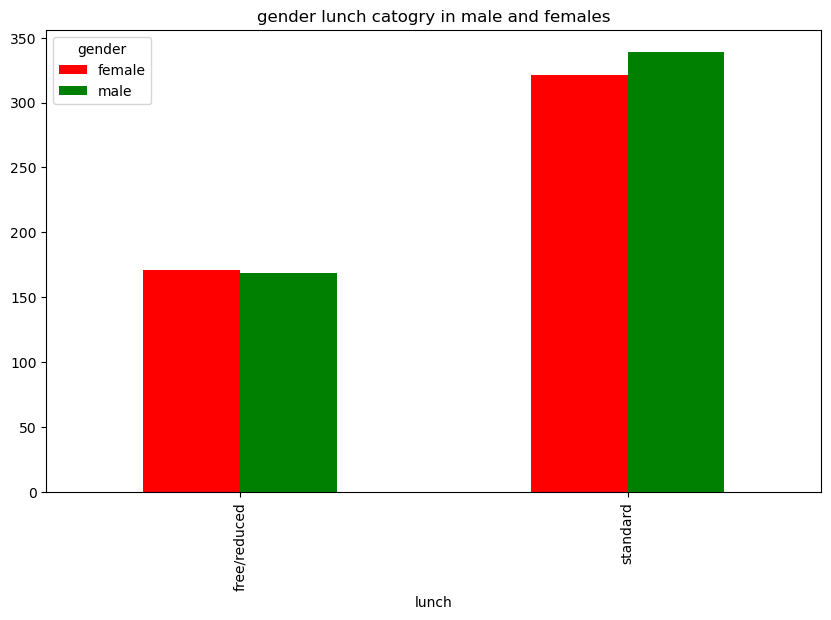

In [42]:
pd.crosstab(exam.lunch ,exam.gender).plot(kind="bar",
                                          figsize=(10,6),
                                  color=['red','green'])
plt.title("gender lunch catogry in male and females")

In [28]:
#counts value of parents level of education
exam["parental level of education"].value_counts()

parental level of education
some college          224
high school           215
associate's degree    204
some high school      177
bachelor's degree     105
master's degree        75
Name: count, dtype: int64

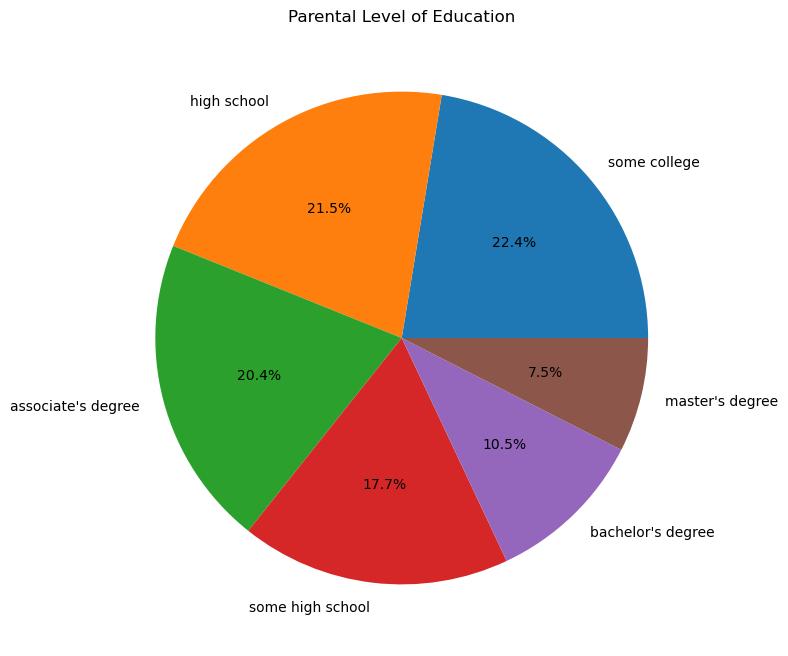

In [35]:
# Get the value counts of the "parental level of education" column
parental_edu_counts = exam["parental level of education"].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(parental_edu_counts, labels=parental_edu_counts.index, autopct='%1.1f%%')
plt.title('Parental Level of Education')
plt.show()

In [52]:
# lets devide data into dependent in independent variebles
X=exam.drop(["writing score","race/ethnicity"],axis=1)
Y=exam["writing score"]

In [53]:
X.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score
0,female,some college,standard,completed,59,70
1,male,associate's degree,standard,none,96,93
2,female,some college,free/reduced,none,57,76
3,male,some college,free/reduced,none,70,70
4,female,associate's degree,standard,none,83,85


In [54]:
Y.head()

0    78
1    87
2    77
3    63
4    86
Name: writing score, dtype: int64

In [55]:
exam.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [56]:
# transfrom data as we dont have all int type data
# import libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [63]:
X.dtypes

gender                         object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
dtype: object

In [64]:
Y.dtypes

dtype('int64')

In [80]:
#lets transform X into int?\/numbers
# transfrom data as we dont have all int type data
# import libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["test preparation course", "lunch", "parental level of education", "gender"]

# Corrected: One_Hot should be OneHotEncoder()
transformer = ColumnTransformer(transformers=[("One_Hot", OneHotEncoder(), categorical_features)],
                                remainder="passthrough")

# Corrected: transformed_X should be assigned the result of fit_transform
transformed_X = transformer.fit_transform(X)

In [81]:
transformed_X

array([[ 1.,  0.,  0., ...,  0., 59., 70.],
       [ 0.,  1.,  0., ...,  1., 96., 93.],
       [ 0.,  1.,  1., ...,  0., 57., 76.],
       ...,
       [ 1.,  0.,  0., ...,  0., 67., 86.],
       [ 0.,  1.,  0., ...,  1., 80., 72.],
       [ 0.,  1.,  0., ...,  1., 58., 47.]])

In [83]:
X.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score
0,female,some college,standard,completed,59,70
1,male,associate's degree,standard,none,96,93
2,female,some college,free/reduced,none,57,76
3,male,some college,free/reduced,none,70,70
4,female,associate's degree,standard,none,83,85


In [82]:
# convert transformed_X into dataframe
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,59.0,70.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,96.0,93.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,57.0,76.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,70.0,70.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,83.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,77.0,77.0
996,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,80.0,66.0
997,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,67.0,86.0
998,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,80.0,72.0


In [84]:
dummies=pd.get_dummies(exam[["test preparation course","lunch","parental level of education","gender"]])
dummies

,test preparation course_completed,test preparation course_none,lunch_free/reduced,lunch_standard,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,gender_female,gender_male
0,True,False,False,True,False,False,False,False,True,False,True,False
1,False,True,False,True,True,False,False,False,False,False,False,True
2,False,True,True,False,False,False,False,False,True,False,True,False
3,False,True,True,False,False,False,False,False,True,False,False,True
4,False,True,False,True,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,True,False,True,False,False,False,False,True,False,False,True
996,False,True,False,True,False,False,False,False,True,False,False,True
997,True,False,False,True,False,False,True,False,False,False,True,False
998,False,True,False,True,False,False,True,False,False,False,False,True


In [87]:
# train test split
from sklearn.model_selection import train_test_split
np.random.seed(48)
X_train,X_test,Y_train,Y_test=train_test_split(transformed_X,Y,test_size=0.25)


In [92]:
#load ML model
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [101]:
#checking the score of training data
reg.score(X_train,Y_train)

0.9422503131402563

In [102]:
# check the score of testing data
reg.score(X_test,Y_test)

0.932388748035444

In [112]:
# saving the model
import pickle

In [119]:
filename="exam_reading score.sav"
pickle.dump(reg,open(filename,'wb'))


In [120]:
# loading the saving model

loaded_model=pickle.load(open('exam_reading score.sav','rb'))

In [122]:
for column in X.columns:
    print(column)

gender
parental level of education
lunch
test preparation course
math score
reading score
